In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
# loading data and a simple EDA for mnist dataset
data = pd.read_csv('mnist.csv')

In [7]:
data.shape

(70000, 785)

In [8]:
data.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [10]:
# seprate features from target data
x = data.drop('class', axis=1)
x.shape

(70000, 784)

In [12]:
# target data
y = data['class']
y.shape

(70000,)

C:\Users\Hamid reza\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

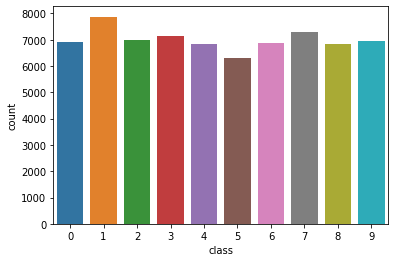

In [14]:
# plot value counts for target and target distribution
sns.countplot(y)

In [17]:
# seprate data for training and test set
xtr = x[:50000]
xts = x[50000:]

In [21]:
# normalize image of digits
xtr = xtr/255.
xts = xts/255.

In [24]:
# reshape images for plot and giving them to model
xtr = xtr.values.reshape(-1,28,28,1)
xts = xts.values.reshape(-1,28,28,1)

xtr.shape

(50000, 28, 28, 1)

In [28]:
# seprate target for training data xtr
ytr = y[:50000]
# give target class names count to 10 (for 0 to 9)
ytr = to_categorical(ytr, num_classes=10)
ytr.shape

(50000, 10)

In [30]:
# split training data into validation and also training
xt, xval, yt, yval = train_test_split(xtr, ytr, test_size=0.1)

In [31]:
xt.shape

(45000, 28, 28, 1)

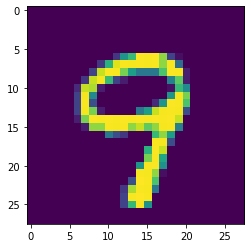

In [32]:
# plot a sample of images
plt.imshow(xt[4])
plt.show()

# Build model

In [33]:
mdl = Sequential()
# use 4 layer of conv2d
mdl.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
mdl.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
mdl.add(MaxPool2D(pool_size=(2,2)))
mdl.add(Dropout(0.25))

mdl.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
mdl.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
mdl.add(MaxPool2D(pool_size=(2,2)))
mdl.add(Dropout(0.25))

mdl.add(Flatten())

mdl.add(Dense(64, activation='relu'))
mdl.add(Dropout(0.5))
mdl.add(Dense(10, activation='softmax'))

In [40]:
mdl.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [43]:
epochs = 5
batch_size = 86
history = mdl.fit(xt, yt, batch_size = batch_size, epochs = epochs, 
          validation_data = (xval, yval), verbose = -1)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


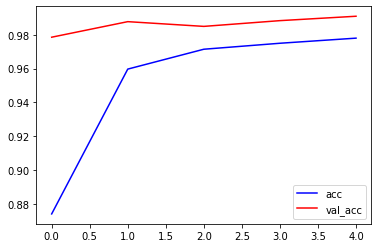

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(len(acc)), acc, color='b', label='acc')
plt.plot(range(len(val_acc)), val_acc, color='r', label='val_acc')
plt.legend()
plt.show()

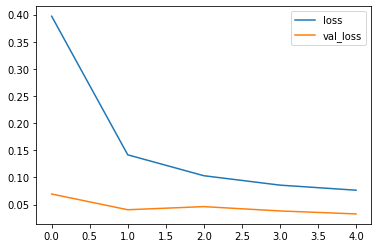

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

In [53]:
# make predictions from test set
preds = mdl.predict(xts)

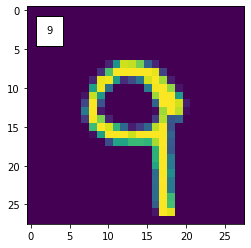

In [78]:
# use argmax to return the class that predicted as the right class
strr = str(preds[3].argmax())

plt.imshow(xts[3])
plt.text(2,3, s=strr,  bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
plt.show()

In [69]:
# gives final loss and accuracy for this model
mdl.evaluate(xt, yt)

1407/1407 [==============================] - 80s 57ms/step - loss: 0.0207 - accuracy: 0.9939


[0.020727960392832756, 0.9938889145851135]

This model reaches 99 percent accuracy with just 5 epoches...

In [1]:
# save the model in .h5 format to reuse it later if we need it
#mdl.save('mnist_model.h5')